# Data Understanding
Untuk dataset saya menggunakan Health_Risk_Dataset.csv
Berikut ringkasan isi dari dataset:
- Patient_ID → ID unik pasien
- Respiratory_Rate → laju pernapasan per menit (int)
- Oxygen_Saturation → kadar oksigen dalam darah (%) (int)
- O2_Scale → skala/level oksigenasi (int)
- Systolic_BP → tekanan darah sistolik (mmHg) (int)
- Heart_Rate → detak jantung (bpm) (int)
- Temperature → suhu tubuh (°C) (float)
- Consciousness → tingkat kesadaran (A, V, P, U = Alert, Voice, Pain, Unresponsive)
- On_Oxygen → status terapi oksigen (0 = tidak, 1 = ya)
- Risk_Level → label target (Low, Medium, High)

## Eksplorasi Data
1. Load Dataset


In [ ]:
pip install pandas matplotlib seaborn scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 840.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/11.0 MB 817.9 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/11.0 MB 817.9 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.0 MB 868.0 kB/s eta 0:00:12
   --- ------------------------------------ 1.0/11.0 MB 868.0 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/11.0 MB 745.8 kB/s eta 0:00:13
   ----- ---------------------------------- 1.6/11.0 MB 806.6 kB/s eta 0:00:12
   ------ --------------------------------- 1.8/11.0 MB 798.8 kB/s eta 0:00:12
   ------ ------------------

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set(style="whitegrid")

# Muat dataset
df = pd.read_csv('Health_Risk_Dataset.csv')

# Tampilkan 5 baris pertama
print("Lima Baris Pertama Data:")
display(df.head())

# Tampilkan informasi umum
print("\nInformasi Umum Dataset:")
df.info()

Lima Baris Pertama Data:


,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low



Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


2. Analisis Missing Value
Langkah ini dilakukan untuk melihat apakah ada data yang hilang atau tidak lengkap

In [8]:
# Memeriksa jumlah missing values di setiap kolom
print(df.isnull().sum())

Patient_ID           0
Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64


Kesimpulan: Dataset ini sangat baik karena tidak memiliki nilai yang hilang sama sekali. Ini menyederhanakan tahap pra-pemrosesan data karena kita tidak perlu melakukan teknik imputasi.

3. Analisis Outlier
Outlier adalah titik data yang berbeda secara signifikan dari observasi lainnya. Mereka bisa jadi merupakan data yang valid (misalnya, pasien dalam kondisi kritis) atau kesalahan input.

Cara terbaik untuk mendeteksi outlier pada data numerik adalah melalui statistik deskriptif dan visualisasi box plot.

In [9]:
# Tampilkan statistik deskriptif untuk deteksi awal
display(df.describe())

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,1.000000


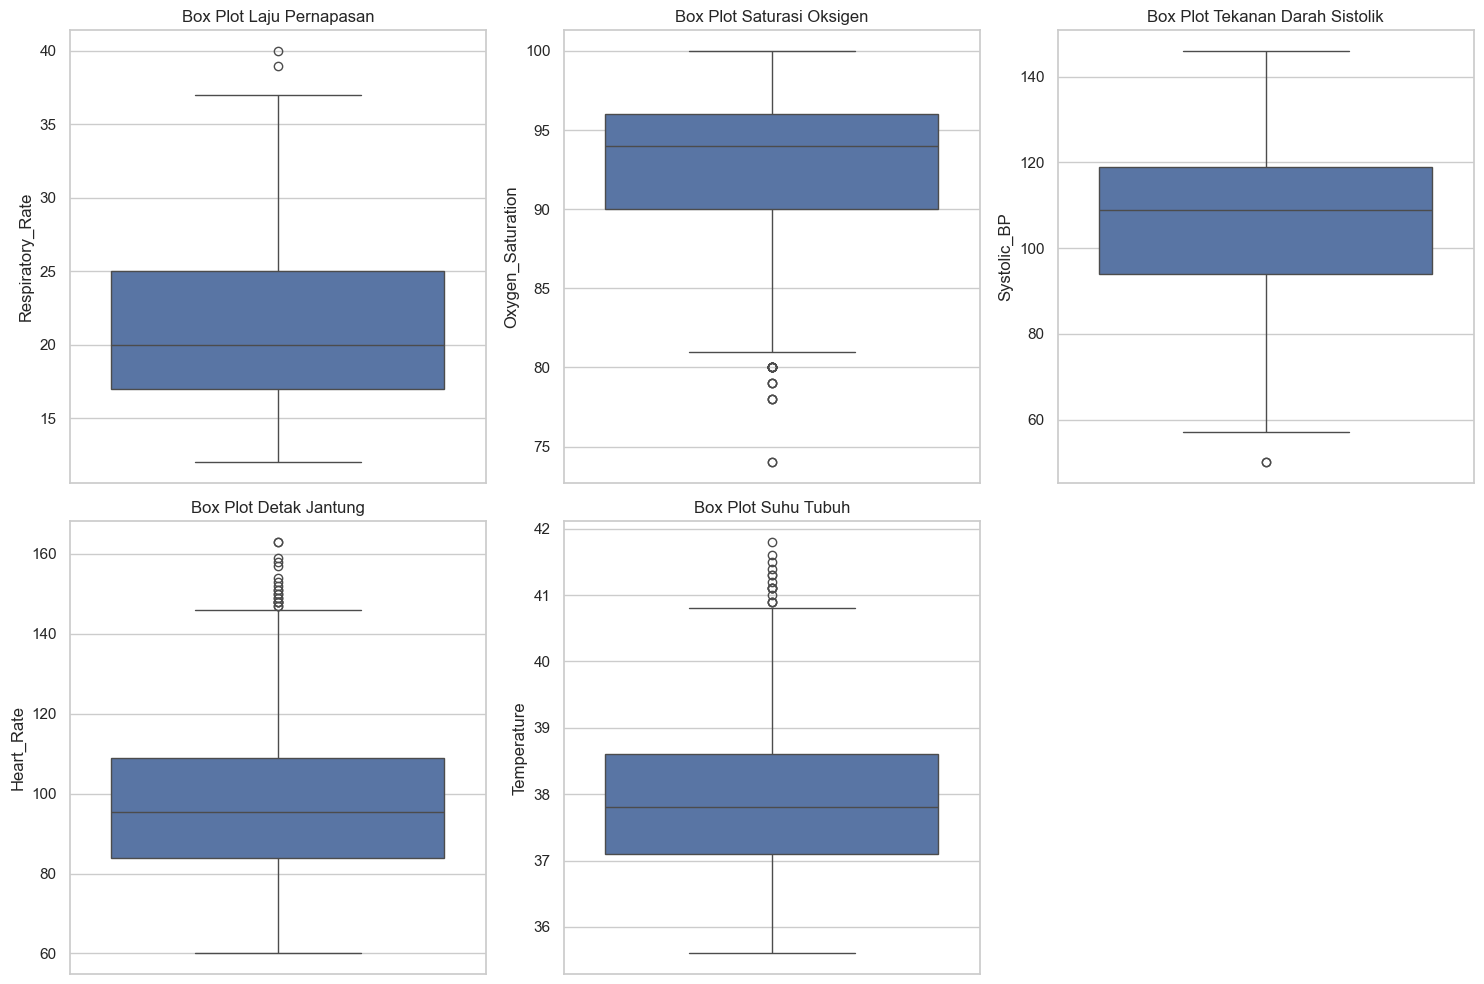

In [10]:
# Visualisasi Box Plot untuk variabel numerik utama
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['Respiratory_Rate'])
plt.title('Box Plot Laju Pernapasan')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['Oxygen_Saturation'])
plt.title('Box Plot Saturasi Oksigen')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['Systolic_BP'])
plt.title('Box Plot Tekanan Darah Sistolik')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['Heart_Rate'])
plt.title('Box Plot Detak Jantung')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['Temperature'])
plt.title('Box Plot Suhu Tubuh')

plt.tight_layout()
plt.show()

Observasi dan Kesimpulan:
- Laju Pernapasan: Beberapa nilai di atas 35 dianggap sebagai outlier oleh box plot, namun dalam konteks medis, laju pernapasan tinggi (takipnea) adalah gejala klinis yang valid dan penting, jadi tidak perlu dihapus.
- Saturasi Oksigen: Beberapa nilai rendah (di bawah 85%) terdeteksi. Ini adalah indikator hipoksemia yang serius dan merupakan data kritis yang valid.
- Detak Jantung & Suhu Tubuh: Terdapat beberapa outlier di batas atas. Ini juga merupakan tanda-tanda klinis yang umum (takikardia dan demam tinggi) dan kemungkinan besar data valid.
- Tekanan Darah Sistolik: Terdapat outlier di batas bawah dan atas. Tekanan darah 50 mmHg sangat rendah (hipotensi berat) dan 146 mmHg cukup tinggi. Keduanya masih dalam rentang fisiologis yang mungkin terjadi pada pasien sakit.

4. Tabel distribusi data Heart_Rate, Temperature, On_Oxygen terhadap Patient_ID

![Screenshot 2025-09-07 220336.png](<attachment:Screenshot 2025-09-07 220336.png>)
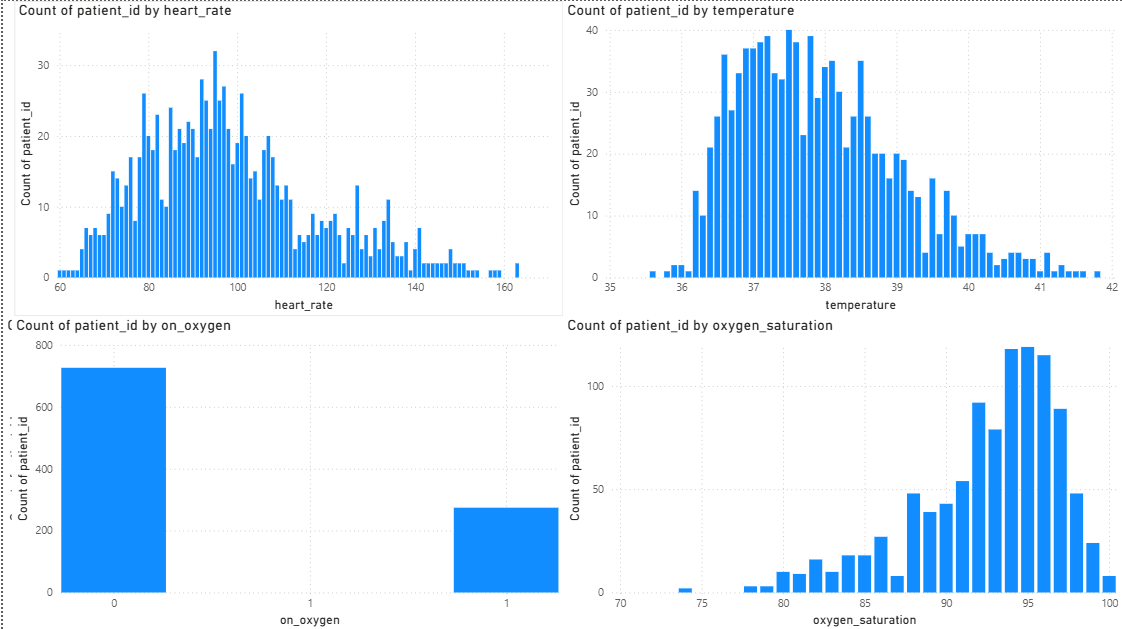